In [25]:
# Generate data for control problem.
import numpy as np
np.random.seed(1)
n = 4
m = 2
T = 50
alpha = 0.2
beta = 5
A = np.eye(n) + alpha*np.random.randn(n,n)
B = np.random.randn(n,m)
x_0 = beta*np.random.randn(n)

In [26]:
A

array([[ 1.32486907, -0.12235128, -0.10563435, -0.21459372],
       [ 0.17308153,  0.53969226,  0.34896235, -0.15224138],
       [ 0.06380782, -0.04987408,  1.29242159, -0.41202814],
       [-0.06448344, -0.07681087,  0.22675389,  0.78002175]])

In [27]:
B

array([[-0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521],
       [-1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434]])

In [28]:
# Form and solve control problem.
from cvxpy import *
x = Variable((n, T+1))
u = Variable((m, T))

In [29]:
cost = 0
constr = []
for t in range(T):
    cost += sum_squares(x[:,t+1]) + sum_squares(u[:,t])
    constr += [x[:,t+1] == A*x[:,t] + B*u[:,t],
               norm(u[:,t], 'inf') <= 1]
# sums problem objectives and concatenates constraints.
constr += [x[:,T] == 0, x[:,0] == x_0]
problem = Problem(Minimize(cost), constr)
problem.solve(verbose=True)

-----------------------------------------------------------------
           OSQP v0.4.1  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 654, constraints m = 758
          nnz(P) + nnz(A) = 2758
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   4.68e+00   5.96e+02   1.00e-01   7.53e-04s
 200   6.3345e+02   2.69e-01   2.62e-01   8.48e+00   4.49e-03s
 400   1.0196e+03   1.17e-01   2.01e-01   8.48e+00   8.14e-03s

1640.0066519921947

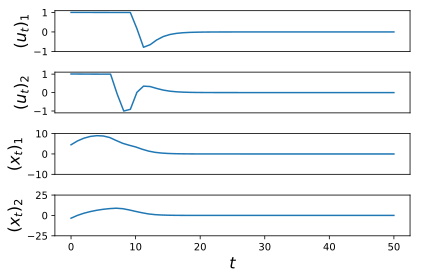

In [30]:
# Plot results.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()

# Plot (u_t)_1.
ax = f.add_subplot(411)
plt.plot(u[0,:].value)
plt.ylabel(r"$(u_t)_1$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.xticks([])

# Plot (u_t)_2.
plt.subplot(4,1,2)
plt.plot(u[1,:].value)
plt.ylabel(r"$(u_t)_2$", fontsize=16)
plt.yticks(np.linspace(-1, 1, 3))
plt.xticks([])

# Plot (x_t)_1.
plt.subplot(4,1,3)
x1 = x[0,:].value
plt.plot(x1)
plt.ylabel(r"$(x_t)_1$", fontsize=16)
plt.yticks([-10, 0, 10])
plt.ylim([-10, 10])
plt.xticks([])

# Plot (x_t)_2.
plt.subplot(4,1,4)
x2 = x[1,:].value
plt.plot(range(51), x2)
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$(x_t)_2$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.tight_layout()
plt.show()

## Portfolio optimization